In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'], index_col='date')

# Clean data
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

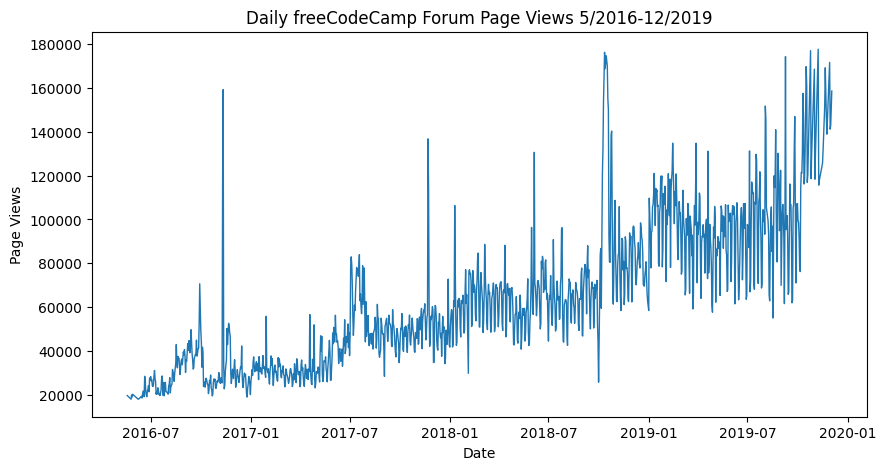

In [27]:
def draw_line_plot():
    fig ,ax = plt.subplots(figsize=(10,5))
    ax.plot(df.index,df['value'],linewidth=1)
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    plt.close(fig)
    return fig
draw_line_plot()

In [30]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.groupby(df['date'].dt.month)

    # Draw bar plot

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000'),
  Text(0, 140000.0, '140000'),
  Text(0, 160000.0, '160000')])

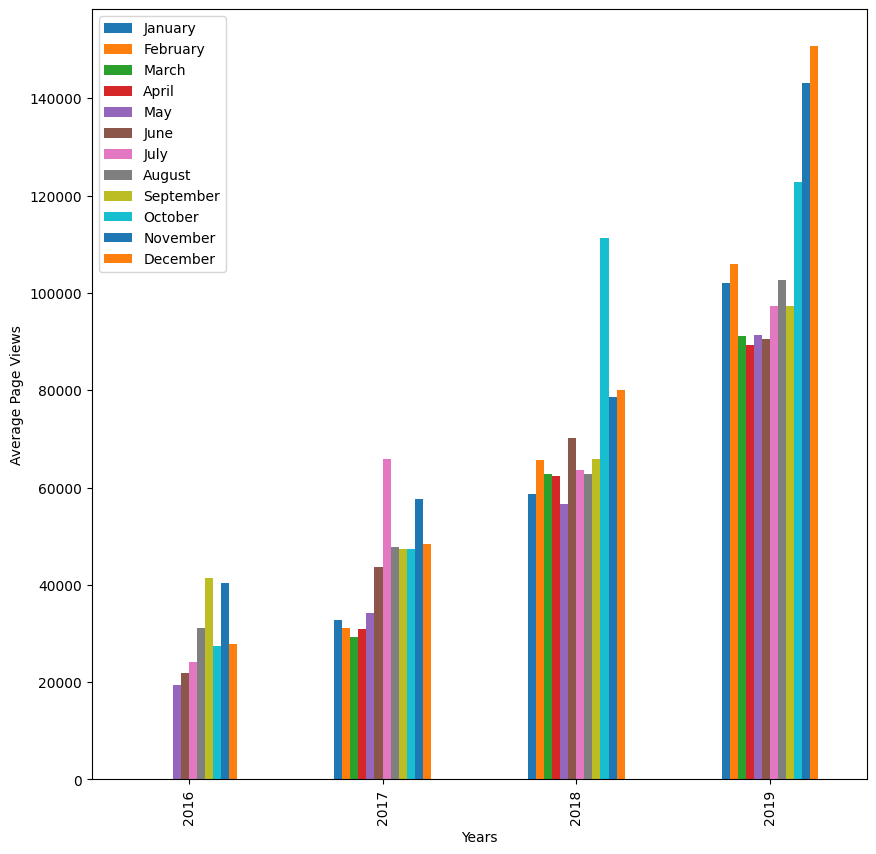

In [49]:
df['month'] = df.index.month
df['year'] = df.index.year
df_bar = df.groupby(['year','month'])['value'].mean()
df_bar = df_bar.unstack()

#Draw bar plot
fig = df_bar.plot.bar(legend=True, figsize = (10,10), ylabel= 'Average Page Views', xlabel ='Years').figure
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

In [ ]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]


Text(0, 0.5, 'Page Views')

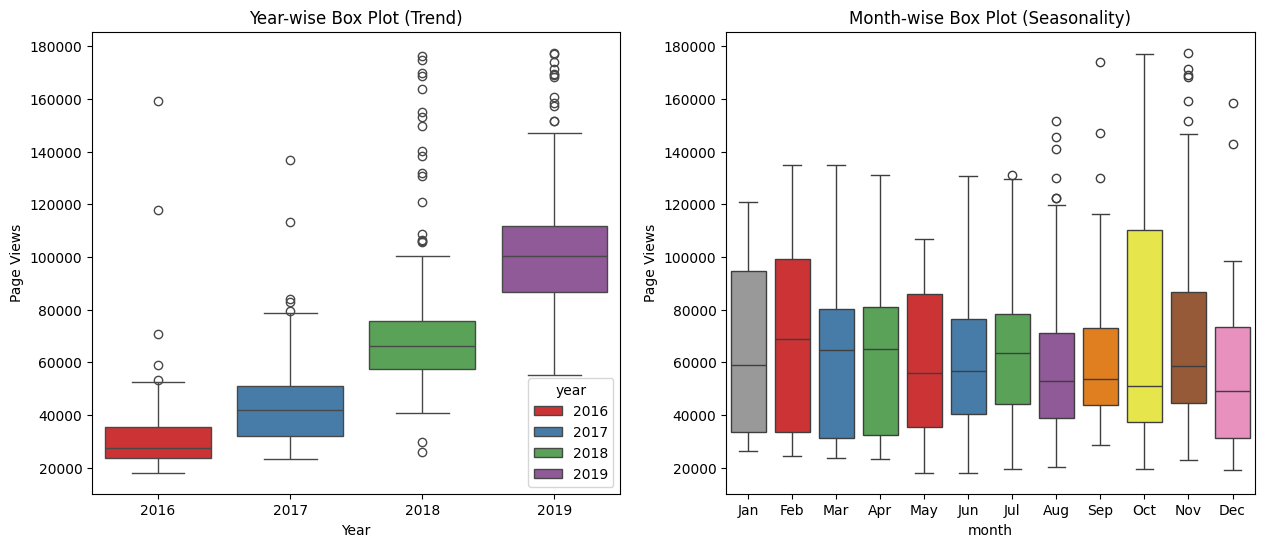

In [62]:
# Draw box plots (using Seaborn)
#Creamos la figura y los subplots
fig, axes = plt.subplots(1,2, figsize=(15,6))

#Gráfico por año
sns.boxplot( x='year', y='value', data = df_box , ax=axes[0],hue='year',palette='Set1')
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

#Gráfico por mes
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot( x='month', y='value', data = df_box , ax = axes[1], order= month_order,hue='month',palette='Set1')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('month')
axes[1].set_ylabel('Page Views')